In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Load And Explore Data(EDA)

In [3]:
df = pd.read_csv("smoke.csv")
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


### 1.1. Checking for basic Statistics and info for Data Frame

In [4]:
df.describe
df.info()
df.isna().sum()

         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464

### 1.2. Building Histogram to check the Data Behaviour

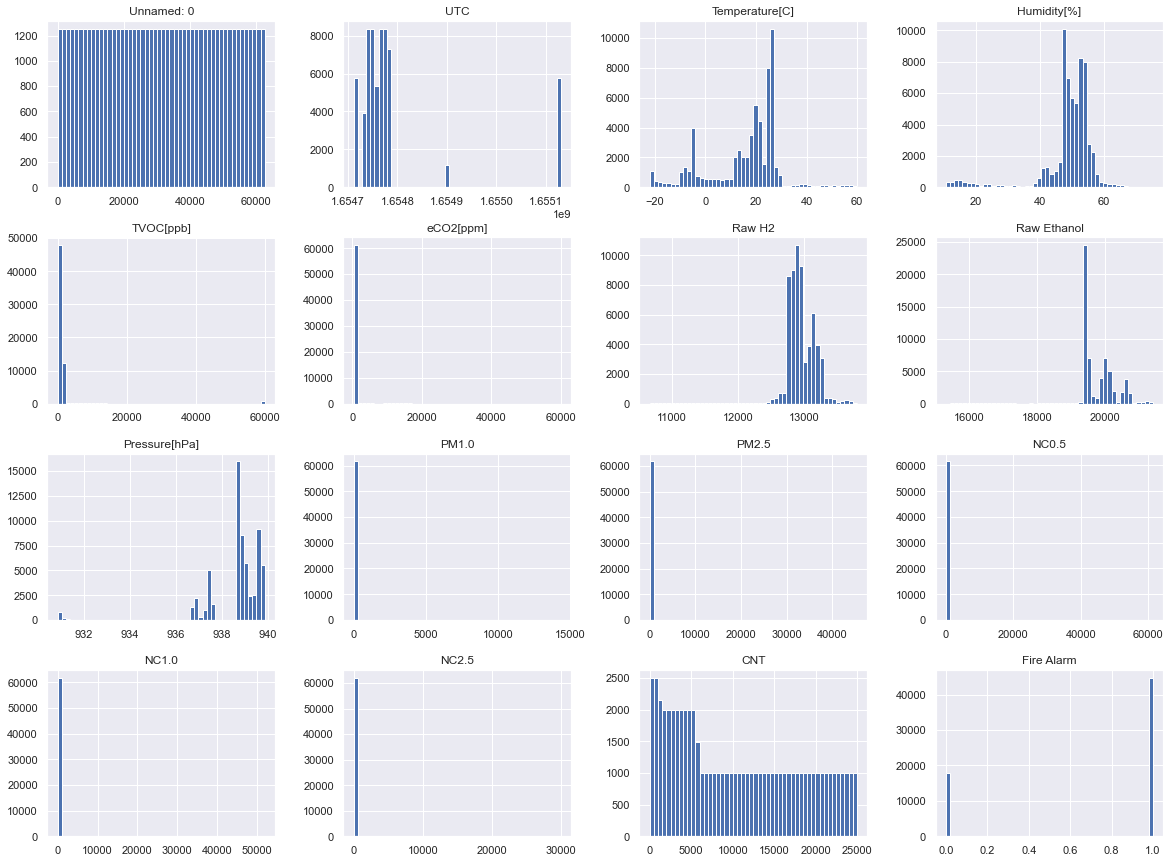

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### 1.3. Performing Train Test Split

In [6]:
features = df.drop("Fire Alarm", axis =1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,df["Fire Alarm"],test_size=0.20,random_state=10)
print(f"x_train data is {x_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"x_test data is {x_test.shape}")
print(f"y_test data is {y_test.shape}")

x_train data is (50104, 15)
y_train data is (50104,)
x_test data is (12526, 15)
y_test data is (12526,)


In [7]:
print(x_train)
y_train

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
38607       38607  1654774956          24.550        53.03       1092   
34717       34717  1654771066          21.640        59.19        778   
54397       54397  1654715442          25.860        48.97        205   
36520       36520  1654772869          25.910        52.05        977   
44808       44808  1654781157          26.800        48.39       1126   
...           ...         ...             ...          ...        ...   
28017       28017  1654764366          21.160        45.48        174   
50496       50496  1654903513          39.050        15.01       1207   
29199       29199  1654765548          21.570        52.60         69   
40061       40061  1654776410          26.540        49.42       1061   
17673       17673  1654751004          16.881        48.88       1258   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
38607        507   12845        19452        9

38607    1
34717    1
54397    0
36520    1
44808    1
        ..
28017    0
50496    1
29199    1
40061    1
17673    1
Name: Fire Alarm, Length: 50104, dtype: int64

In [8]:
df_train_copy = x_train.copy()

### 1.4. Checking for Correlation for training set

<AxesSubplot:>

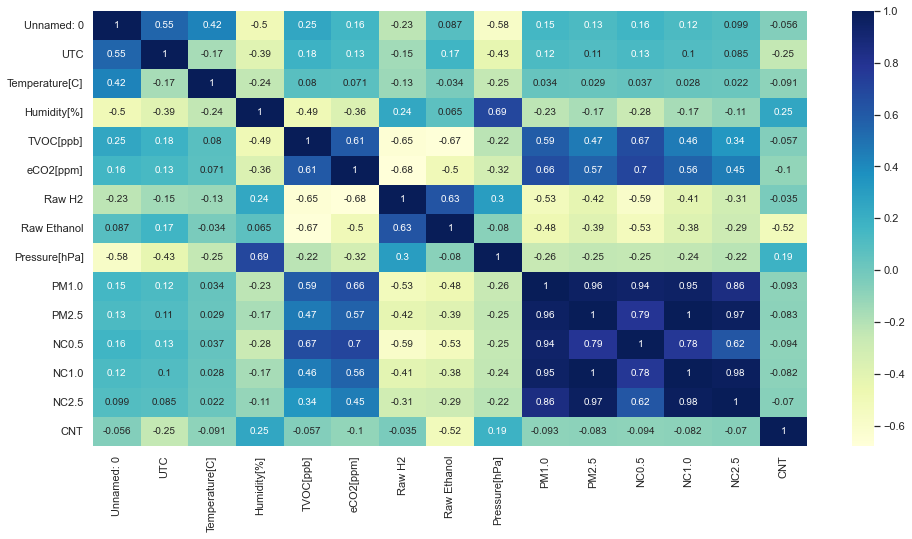

In [9]:
# Explore data visually
# Build Correlation Matrix to
correlation = df_train_copy.corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

# 2. Data Preprocessing

### 2.1 Data Cleaning

In [10]:
x_train = x_train.drop(['Unnamed: 0', 'UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"], axis=1)
x_test = x_test.drop(['Unnamed: 0', 'UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"], axis=1)

In [11]:
x_train.describe()
x_train.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0'],
      dtype='object')

### 2.2 Feature Scaling using StandardScaller

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_train)
scaled_data = model.transform(x_train)
x_train_tr = pd.DataFrame(scaled_data)
x_train_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']
x_train_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04
mean,7.966599e-17,2.362571e-16,1.329635e-16,1.587836e-16,-5.992033e-16,-2.857016e-15,3.548850e-14,1.220428e-17,2.562339e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.641423e+00,-4.281348e+00,-2.485160e-01,-1.402998e-01,-8.403246e+00,-7.300395e+00,-5.887417e+00,-1.145881e-01,-9.076504e-02
25%,-3.457470e-01,-1.158733e-01,-2.319224e-01,-1.402998e-01,-4.176773e-01,-5.272137e-01,5.215788e-02,-1.124939e-01,-9.015125e-02
50%,2.905531e-01,1.807710e-01,-1.221991e-01,-1.402998e-01,-7.047871e-02,-4.186586e-01,1.407066e-01,-1.116463e-01,-8.990538e-02
75%,6.583905e-01,5.306301e-01,-9.557219e-02,-1.201050e-01,6.128378e-01,5.307875e-01,5.940457e-01,-1.111836e-01,-8.977051e-02
max,3.063781e+00,3.017007e+00,7.469421e+00,3.153365e+01,3.176198e+00,2.721216e+00,9.308336e-01,1.440121e+01,2.286658e+01


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_test)
scaled_data = model.transform(x_test)
x_test_tr = pd.DataFrame(scaled_data)
x_test_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']
x_test_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04
mean,1.948253e-16,4.909351e-16,-3.711749e-17,5.165670e-16,7.065739e-16,1.094225e-15,-4.430753e-14,-2.089313e-17,3.534149e-17
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-2.659443e+00,-4.189821e+00,-2.490576e-01,-1.470891e-01,-8.136270e+00,-7.200485e+00,-5.663072e+00,-1.176935e-01,-9.761203e-02
25%,-3.491881e-01,-1.049146e-01,-2.325990e-01,-1.470891e-01,-3.901512e-01,-5.119713e-01,6.280846e-02,-1.157249e-01,-9.693976e-02
50%,2.839896e-01,1.840856e-01,-1.263089e-01,-1.470891e-01,-5.710037e-02,-4.014979e-01,1.445234e-01,-1.148672e-01,-9.665338e-02
75%,6.507294e-01,5.317194e-01,-9.942232e-02,-1.282098e-01,6.018390e-01,5.310275e-01,5.893954e-01,-1.144064e-01,-9.649773e-02
max,3.051981e+00,2.956264e+00,7.289243e+00,2.965955e+01,3.083605e+00,2.685259e+00,9.098710e-01,1.389438e+01,2.526527e+01


# 3. Model Building

### 3.1. Build different Classification models and checking the performance for each

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tr, y_train)
lr_accuracy = model.score(x_test_tr, y_test)
print(f"Accuracy of Logistic Regression Model ---> {lr_accuracy}")
lr_predict = model.predict(x_test_tr)

Accuracy of Logistic Regression Model ---> 0.8951780296982277


In [15]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
model.fit(x_train_tr, y_train)
dt_accuracy = model.score(x_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {dt_accuracy}")
dt_predict = model.predict(x_test_tr)

Accuracy of Decision Tree Model ---> 0.9330991537601788


In [16]:
from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier()
model.fit(x_train_tr, y_train)
rf_accuracy = model.score(x_test_tr, y_test)
print(f"Accuracy of Random Forest Model ---> {rf_accuracy}")
rf_predict = model.predict(x_test_tr)

Accuracy of Random Forest Model ---> 0.9498642822928309


In [17]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train_tr, y_train)
ada_accuracy = model.score(x_test_tr, y_test)
print(f"Accuracy of AdaBoost Model ---> {ada_accuracy}")
ada_predict = model.predict(x_test_tr)

Accuracy of AdaBoost Model ---> 0.9314226409069136


# 4. Further Performance Analysis

### 4.1. Confusion Matrix

In [18]:
lr_cnf_matrix = confusion_matrix(y_test, lr_predict)
dt_cnf_matrix = confusion_matrix(y_test, dt_predict)
rf_cnf_matrix = confusion_matrix(y_test, rf_predict)
ada_cnf_matrix = confusion_matrix(y_test, ada_predict)
print(f"CM for LR ---> {lr_cnf_matrix}")
print(f"CM for LR ---> {dt_cnf_matrix}")
print(f"CM for LR ---> {rf_cnf_matrix}")
print(f"CM for LR ---> {ada_cnf_matrix}")

CM for LR ---> [[2743  848]
 [ 465 8470]]
CM for LR ---> [[3591    0]
 [ 838 8097]]
CM for LR ---> [[3589    2]
 [ 626 8309]]
CM for LR ---> [[3583    8]
 [ 851 8084]]


CM for Logistic Regression
Confusion matrix, without normalization
[[2743  848]
 [ 465 8470]]
Normalized confusion matrix
[[0.76385408 0.23614592]
 [0.05204253 0.94795747]]


C:\Users\18040\AppData\Local\Temp\ipykernel_14052\3381567182.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


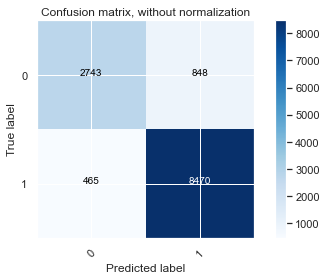

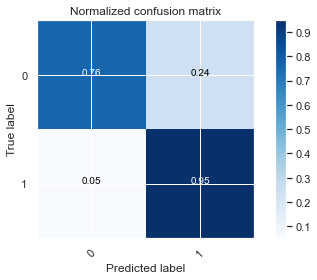

In [19]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print("CM for Logistic Regression")
plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

CM for Decision Tree
Confusion matrix, without normalization
[[3591    0]
 [ 838 8097]]
Normalized confusion matrix
[[1.         0.        ]
 [0.09378847 0.90621153]]


C:\Users\18040\AppData\Local\Temp\ipykernel_14052\1019429077.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


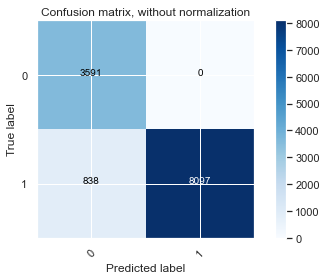

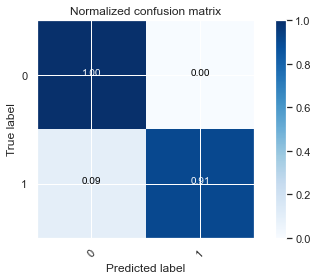

In [20]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print("CM for Decision Tree")
plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

CM for Random Forest
Confusion matrix, without normalization
[[3589    2]
 [ 626 8309]]
Normalized confusion matrix
[[9.99443052e-01 5.56947925e-04]
 [7.00615557e-02 9.29938444e-01]]


C:\Users\18040\AppData\Local\Temp\ipykernel_14052\759481309.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


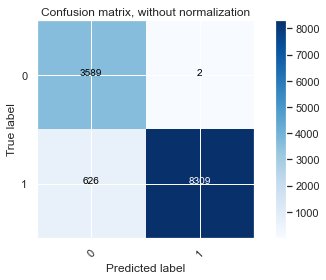

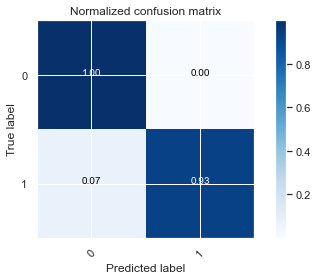

In [21]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print("CM for Random Forest")
plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

CM for Ada Boost
Confusion matrix, without normalization
[[3583    8]
 [ 851 8084]]
Normalized confusion matrix
[[0.99777221 0.00222779]
 [0.09524342 0.90475658]]


C:\Users\18040\AppData\Local\Temp\ipykernel_14052\4111192190.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


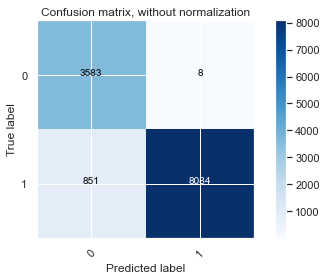

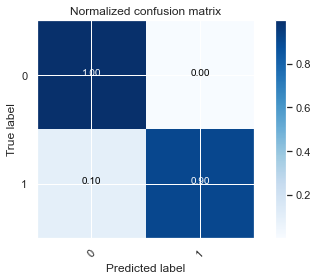

In [22]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print("CM for Ada Boost")
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### 4.2. Precision and Recall

In [23]:
from sklearn.metrics import precision_score
lr_precision = precision_score(y_test, lr_predict)
dt_precision = precision_score(y_test, dt_predict)
rf_precision = precision_score(y_test, rf_predict)
ada_precision = precision_score(y_test, ada_predict)

print(f"Precision_Score for LR ---> {lr_precision}")
print(f"Precision_Score for DT --->{dt_precision}")
print(f"Precision_Score for RF --->{rf_precision}")
print(f"Precision_Score for ADA --->{ada_precision}")

Precision_Score for LR ---> 0.9089933462116334
Precision_Score for DT --->1.0
Precision_Score for RF --->0.9997593550715919
Precision_Score for ADA --->0.9990113692535838


In [24]:
from sklearn.metrics import recall_score 
lr_recall= recall_score(y_test, lr_predict)
dt_recall= recall_score(y_test, dt_predict)
rf_recall= recall_score(y_test, rf_predict)
ada_recall = recall_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"Recall_score for LR ---> {lr_recall}")
print(f"Recall_score for DT --->{dt_recall}")
print(f"Recall_score for RF --->{rf_recall}")
print(f"Recall_score for ADA --->{ada_recall}")

Recall_score for LR ---> 0.9479574706211528
Recall_score for DT --->0.906211527700056
Recall_score for RF --->0.9299384443200895
Recall_score for ADA --->0.9047565752658087


### 4.3. F1 Score

In [25]:
from sklearn.metrics import f1_score
lr_f1_score = f1_score(y_test, lr_predict)
dt_f1_score = f1_score(y_test, dt_predict)
rf_f1_score = f1_score(y_test, rf_predict)
ada_f1_score = f1_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"F1 Score for LR ---> {lr_f1_score}")
print(f"F1 Score for DT --->{dt_f1_score}")
print(f"F1 Score for RF --->{rf_f1_score}")
print(f"F1 Score for ADA --->{ada_f1_score}")

F1 Score for LR ---> 0.9280666191858873
F1 Score for DT --->0.9507984969469234
F1 Score for RF --->0.9635857590165836
F1 Score for ADA --->0.9495507135725613
